<a href="https://colab.research.google.com/github/aryan-at-ul/graph_from_patches/blob/main/image_as_graph_chapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

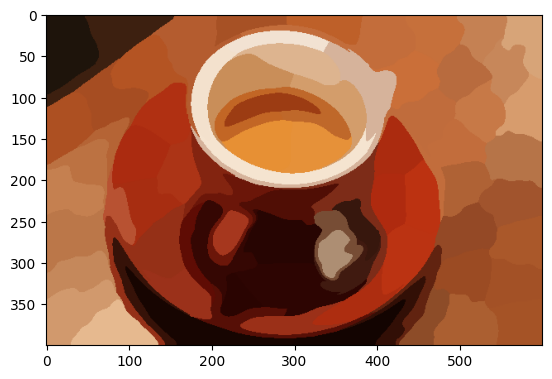

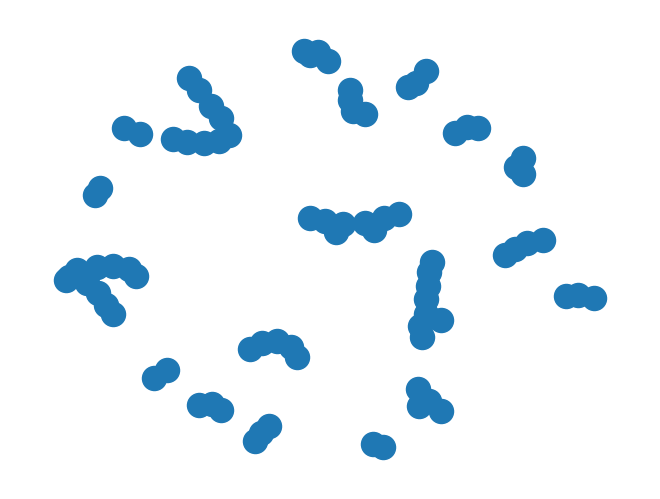

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.future import graph
from skimage import data, segmentation, color
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Load an example image
image = data.coffee()

# Apply SLIC and extract (approximately) the supplied number of superpixels
superpixels = slic(image, n_segments=100, sigma=5)

# Create a RAG based on the superpixels
g = graph.rag_mean_color(image, superpixels)

# Draw superpixels over original image
out1 = color.label2rgb(superpixels, image, kind='avg')
plt.imshow(out1)
plt.show()

# Prepare for KNN
# Flatten the superpixel connectivity graph 'g'
X = np.array([g.nodes[n]['mean color'] for n in g.nodes])

# Use superpixel label as target
y = np.array([n for n in g.nodes])

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Create a new graph using KNN
new_graph = nx.Graph()
for edge in knn.kneighbors(X, return_distance=False):
    new_graph.add_edge(edge[0], edge[1])




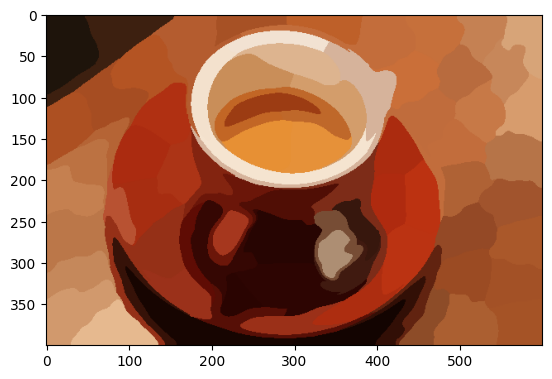

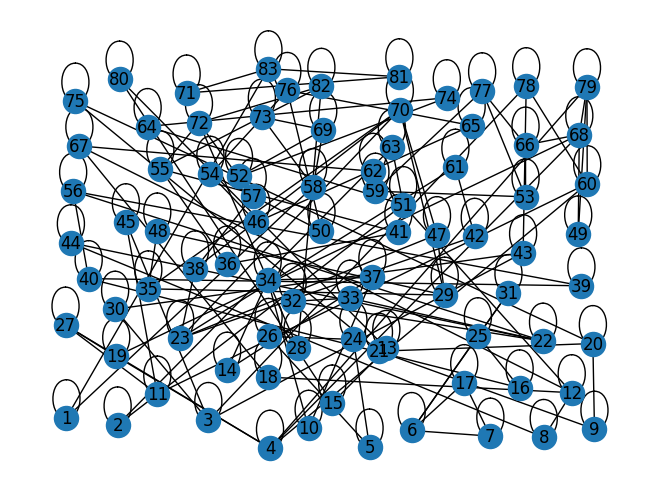

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.future import graph
from skimage import data, color
from skimage.measure import regionprops
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Load an example image
image = data.coffee()

# Apply SLIC and extract (approximately) the supplied number of superpixels
superpixels = slic(image, n_segments=100, sigma=5)

# Create a RAG based on the superpixels
g = graph.rag_mean_color(image, superpixels)

# Prepare for KNN
# Flatten the superpixel connectivity graph 'g'
X = np.array([g.nodes[n]['mean color'] for n in g.nodes])

# Use superpixel label as target
y = np.array([n for n in g.nodes])

# Store the centroid for each superpixel
centroids = {n: regionprops((n == superpixels).astype(int))[0].centroid for n in np.unique(superpixels)}

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Create a new graph using KNN
new_graph = nx.Graph()
for i, edges in enumerate(knn.kneighbors(X, return_distance=False)):
    for edge in edges:
        new_graph.add_edge(y[i], y[edge])

# Plot superpixels over original image
out1 = color.label2rgb(superpixels, image, kind='avg')
plt.imshow(out1)
plt.show()

# Plot new graph
nx.draw(new_graph, {n: centroids[n][::-1] for n in new_graph.nodes}, with_labels=True)
plt.show()
